* 박조은 강사님 inflearn강의  
단 두장의 문서로 데이터 분석과 시각화 뽀개기 
출처: https://www.inflearn.com/course/%ED%8C%90%EB%8B%A4%EC%8A%A4-pandas/lecture/20846?tab=note

## 파이썬 데이터 시각회 히스토그램과 산점도를 보완한 Hexbin plot 그리기

* Hexbin plot은 데이터가 클 때 각각의 점을 산점도(scatter plot)로 표현할 때의 단점을 보완할 수 있다.
* https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#hexagonal-bin-plot

In [2]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

#한글폰트 사용시 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

In [6]:
df = pd.DataFrame(np.random.randn(1000, 2), columns=['a', 'b'])
df['b'] = df['b'] + np.arange(1000)
# np.arange(1000) : 0부터 인덱스 번호를 찍고 있어서 뒤로 갈수록 값의 크기가 커진다.

In [7]:
df.tail()

,a,b
995,-0.308328,995.259440
996,0.941688,996.967559
997,0.810478,996.083358
998,0.116409,998.502489
999,-0.055996,998.254626


<AxesSubplot:xlabel='a', ylabel='b'>

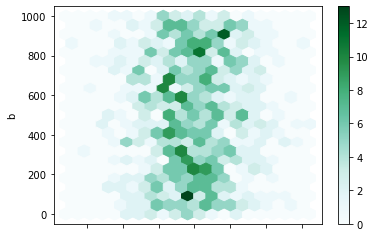

In [8]:
# binning을 이용해 데이터의 크고 작음을 알 수 있다.
df.plot.hexbin(x='a', y='b', gridsize=20)

<AxesSubplot:xlabel='a', ylabel='b'>

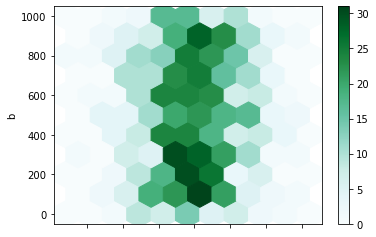

In [9]:
df.plot.hexbin(x='a', y='b', gridsize=10)

In [10]:
df['z'] = np.random.uniform(0,3,1000)

<AxesSubplot:xlabel='a', ylabel='b'>

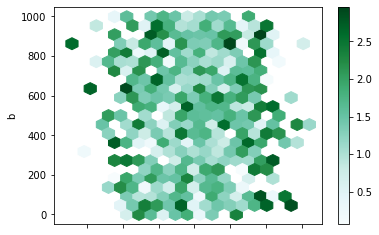

In [21]:
df.plot.hexbin(x='a',y='b',C='z',reduce_C_function=np.median, gridsize=20)

* reduce_C_function : 기본적으로 각 (x, y) 점 주변의 개수에 대한 히스토그램이 계산됩니다. C 및 reduce_C_function 인수에 값을 전달하여 대체 집계를 지정할 수 있습니다. C는 각 (x, y) 점에서 값을 지정하고 reduce_C_function은 빈의 모든 값을 단일 숫자 (예 : 평균, 최대 값, 합계, 표준)로 줄이는 하나의 인수의 함수입니다. 이 예에서 위치는 열 (column) a 및 b에 의해 주어지며 값은 열 (z)에 의해 주어진다. 빈은 NumPy의 max 함수로 집계됩니다